In [1]:
import os, json, pandas
from pathlib import Path
from matplotlib import pyplot as plt
from mne.preprocessing import ICA
from scipy.signal import periodogram, welch
import numpy as np
import mne

In [17]:
def construct_mne_raw_array(file_path, s_freq, channel_info=None, channel_names=None, channel_types=None):
    if channel_info is None:
        if channel_names is None or channel_types is None:
            raise Exception('Either `channel_info` is needed or `channel_names` and `channel_types` are needed')
        channel_info = mne.create_info(ch_names=channel_names, ch_types=channel_types, sfreq=s_freq)
    
    with open(file_path) as f:
        file_dat = f.readlines()
        
    data_parts = np.array([part.strip().split() for part in file_dat])
    return mne.io.RawArray(np.transpose(data_parts), channel_info)

In [26]:
def split_bands(raw_array):
    delta = raw_array.copy().filter(l_freq=1.0, h_freq=3.0)
    theta = raw_array.copy().filter(l_freq=4.0, h_freq=7.0)
    alpha = raw_array.copy().filter(l_freq=8.0, h_freq=12.0)
    beta = raw_array.copy().filter(l_freq=13.0, h_freq=30.0)
    return delta, theta, alpha, beta

### Read the data

In [18]:
dataset_path_str = 'STEW_Dataset'
data_path = Path(dataset_path_str)

In [19]:
file_paths = list(data_path.glob('**/sub*.txt'))
file_paths.sort()

In [20]:
channel_names = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
channel_types = ['eeg' for _ in range(len(channel_names))]

In [21]:
s_freq = 128
channel_info = mne.create_info(ch_names=channel_names, ch_types=channel_types, sfreq=s_freq)

In [91]:
participant_raw_high = construct_mne_raw_array(file_paths[2], s_freq, channel_info)

Creating RawArray with float64 data, n_channels=14, n_times=19200
    Range : 0 ... 19199 =      0.000 ...   149.992 secs
Ready.


In [92]:
participant_raw_low = construct_mne_raw_array(file_paths[3], s_freq, channel_info)

Creating RawArray with float64 data, n_channels=14, n_times=19200
    Range : 0 ... 19199 =      0.000 ...   149.992 secs
Ready.


In [93]:
filtered_raw_high = participant_raw_high.filter(h_freq=None, l_freq=1.0)
filtered_raw_low = participant_raw_low.filter(h_freq=None, l_freq=1.0)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 423 samples (3.305 sec)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 423 samples (3.305 sec)



In [94]:
filtered_data_high = filtered_raw_high.get_data()
filtered_data_low = filtered_raw_low.get_data()

In [95]:
delta_high, theta_high, alpha_high, beta_high = split_bands(filtered_raw_high)
delta_low, theta_low, alpha_low, beta_low = split_bands(filtered_raw_low)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 3 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 3.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Filter length: 423 samples (3.305 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 7.00

Effective window size : 16.000 (s)


<ipython-input-96-64b7c80b691c>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  _ = beta_high.plot_psd()


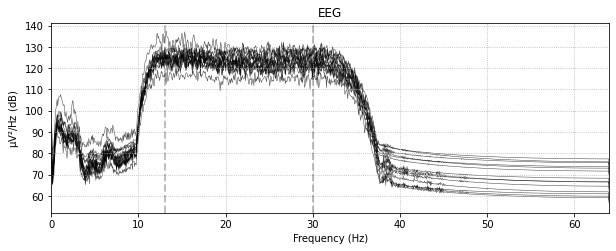

In [96]:
_ = beta_high.plot_psd()

Effective window size : 16.000 (s)


<ipython-input-97-82562d40bafc>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  _ = beta_low.plot_psd()


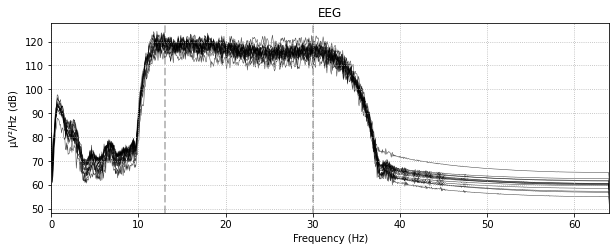

In [97]:
_ = beta_low.plot_psd()

Effective window size : 16.000 (s)


<ipython-input-98-11a5a1f833df>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  _ = theta_high.plot_psd()


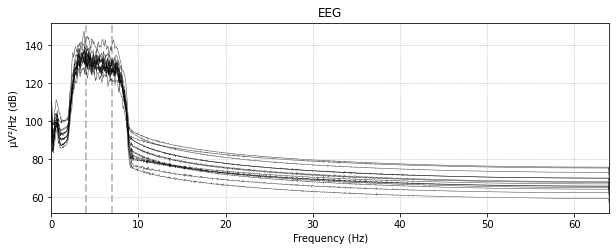

In [98]:
_ = theta_high.plot_psd()

Effective window size : 16.000 (s)


<ipython-input-99-91070e8a367d>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  _ = theta_low.plot_psd()


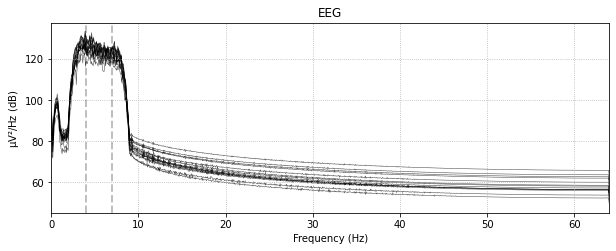

In [99]:
_ = theta_low.plot_psd()

Effective window size : 16.000 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


<ipython-input-100-55ae22953fa3>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  _ = beta_low.copy().pick(channel_names[4]).plot_psd()


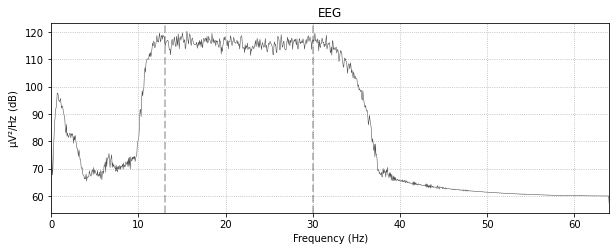

In [100]:
_ = beta_low.copy().pick(channel_names[4]).plot_psd()

Effective window size : 16.000 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


<ipython-input-101-581cdc3be2ca>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  _ = theta_low.copy().pick(channel_names[4]).plot_psd()


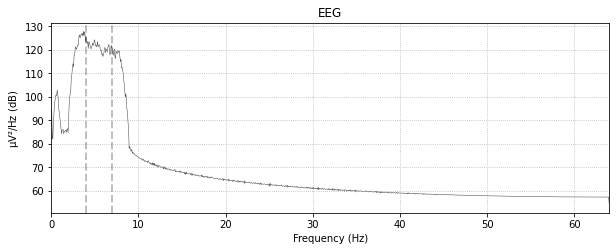

In [101]:
_ = theta_low.copy().pick(channel_names[4]).plot_psd()

In [102]:
nseg = 512
noverlap = 128